# 1. Loading and normalizing CIFAR-10

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
batch_size = 1000

train_transform = transforms.Compose(
    [
#   transforms.RandomCrop(32, padding=4),
#   transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

test_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print('train set size: {}'.format(len(trainset)))
log_freq = len(trainset)//batch_size
print('log freq: {}'.format(log_freq))
print('test set size: {}'.format(len(testset)))

Files already downloaded and verified
Files already downloaded and verified
train set size: 50000
log freq: 50
test set size: 10000


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1000, 3, 32, 32])


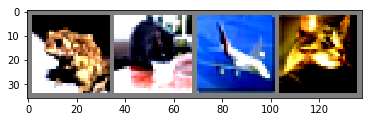

 frog   cat plane   cat


In [5]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# 2. Define Lenet with/without dropout

In [6]:
import torch.nn as nn
import torch.nn.functional as F

In [7]:
# Lenet without dropout 
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 192, 5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(192, 192, 5, padding=2)
        self.fc1 = nn.Linear(192 * 8 * 8, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 10)
        
        nn.init.xavier_uniform_(self.conv1.weight)
        nn.init.constant_(self.conv1.bias, 0.0)
        nn.init.xavier_uniform_(self.conv2.weight)
        nn.init.constant_(self.conv2.bias, 0.0)
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.constant_(self.fc1.bias, 0.0)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.constant_(self.fc2.bias, 0.0)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.constant_(self.fc3.bias, 0.0)

    def forward(self, x):
        x = self.pool(self.conv1(x))
        x = self.pool(self.conv2(x))
        x = x.view(-1, 192 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# Lenet with dropout
class Net_DO(nn.Module):
    def __init__(self):
        super(Net_DO, self).__init__()
        self.conv1 = nn.Conv2d(3, 192, 5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(192, 192, 5, padding=2)
        self.fc1 = nn.Linear(192 * 8 * 8, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(p=0.3)
        
        nn.init.xavier_uniform_(self.conv1.weight)
        nn.init.constant_(self.conv1.bias, 0.0)
        nn.init.xavier_uniform_(self.conv2.weight)
        nn.init.constant_(self.conv2.bias, 0.0)
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.constant_(self.fc1.bias, 0.0)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.constant_(self.fc2.bias, 0.0)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.constant_(self.fc3.bias, 0.0)


    def forward(self, x):
        x = self.pool(self.conv1(x))
        x = self.pool(self.conv2(x))
        x = x.view(-1, 192 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(self.dropout(x)))
        x = self.fc3(self.dropout(x))
        return x
    
# Lenet with MCDO
class Net_MCDO(nn.Module):
    def __init__(self):
        super(Net_MCDO, self).__init__()
        self.conv1 = nn.Conv2d(3, 192, 5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(192, 192, 5, padding=2)
        self.fc1 = nn.Linear(192 * 8 * 8, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(p=0.3)
        
        nn.init.xavier_uniform_(self.conv1.weight)
        nn.init.constant_(self.conv1.bias, 0.0)
        nn.init.xavier_uniform_(self.conv2.weight)
        nn.init.constant_(self.conv2.bias, 0.0)
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.constant_(self.fc1.bias, 0.0)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.constant_(self.fc2.bias, 0.0)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.constant_(self.fc3.bias, 0.0)


    def forward(self, x):
        x = self.pool(self.dropout(self.conv1(x)))
        x = self.pool(self.dropout(self.conv2(x)))
        x = x.view(-1, 192 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(self.dropout(x)))
        x = F.softmax(self.fc3(self.dropout(x)),dim=1)
        return x
    
def update_target(target, original, update_rate):
        for target_param, param in zip(target.parameters(), original.parameters()):
            target_param.data.copy_((1.0 - update_rate) * target_param.data + update_rate*param.data)

# 3. Define a Loss function and optimizer

In [8]:
import torch.optim as optim

In [9]:
CE = nn.CrossEntropyLoss()

In [10]:
def train(epoch, net, net_test, optimizer, log_freq=log_freq):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = CE(outputs, labels)
        loss.backward()
        optimizer.step()
        update_target(net_test, net, 0.001)

        # print statistics
        running_loss += loss.item()
        if (i+1) % log_freq == 0:    # print every 2000 mini-batches
            print('[Epoch : %d, Iter: %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / log_freq))
    return running_loss / log_freq

def test(net, is_MCDO=False):
    print('Start test')
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            output = 0
            if is_MCDO:
                for i in range(10):
                    output += net(inputs)/10.
                output = torch.log(output)
            else:
                output = net(inputs)
            _, predicted = torch.max(output, 1)
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


    for i in range(10):
        print('Accuracy of %5s : %.2f %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

    test_score = np.mean([100 * class_correct[i] / class_total[i] for i in range(10)])
    print(test_score)
    return test_score

In [11]:
from tqdm import tqdm_notebook

lenets = [Net, Net_DO, Net_MCDO]
epoch_num = 200
test_freq = 10
losses = list()
net_scores = list()
test_scores = list()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
is_train = True

# SAVE
def save(name, net, net_test):
    net_path = './model/'+name+'.pkl'
    net_test_path = './model/'+name+'_test.pkl'
    net = net.cpu()
    torch.save(net.state_dict(), net_path)
    net_test = net_test.cpu()
    torch.save(net_test.state_dict(), net_test_path)
    # Place it to GPU back
    net.to(device)
    net_test.to(device)
    return net, net_test
    
def load(name, net, net_test):
    net_path = './model/'+name+'.pkl'
    net_test_path = './model/'+name+'_test.pkl'
    # LOAD
    net.load_state_dict(torch.load(net_path))
    net_test.load_state_dict(torch.load(net_test_path))
    # Place it to GPU
    net.to(device)
    net_test.to(device)
    return net, net_test

def main():
    for lenet in lenets:
        print(lenet.__name__)
        net = lenet()
        net_test = lenet()
        if torch.cuda.device_count() > 1:
            print("Let's use",torch.cuda.device_count(),"GPUs!")
            net = nn.DataParallel(net)
            net_test = nn.DataParallel(net_test)
        net.to(device)
        net_test.to(device)
        net_test.load_state_dict(net.state_dict())
        
        optimizer = optim.Adam(net.parameters(), lr=5e-4, weight_decay=0.0005, amsgrad=True)
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.75)
        
        for i in tqdm_notebook(range(epoch_num)):
            scheduler.step()
            if lenet.__name__ == 'Net_DO':
                net.train()
                net_test.train()
            loss_avg = train(epoch=i, net=net, net_test=net_test, optimizer=optimizer)
            losses.append(loss_avg)
            if (i+1) % test_freq == 0:
                if lenet.__name__ == 'Net_DO':
                    print('NET_DO TEST')
                    net.eval()
                    net_test.eval()
                if lenet.__name__ == 'Net_MCDO':
                    print('NET_MCDO TEST')
                    print('Train net test')
                    net_score = test(net,is_MCDO=True)
                    net_scores.append(net_score)
                    print('Test net test')
                    test_score = test(net_test,is_MCDO=True)
                    test_scores.append(test_score)
                else:
                    print('Train net test')
                    net_score = test(net)
                    net_scores.append(net_score)
                    print('Test net test')
                    test_score = test(net_test)
                    test_scores.append(test_score)
                
        save(lenet.__name__, net, net_test)

In [12]:
if is_train:
    main()

Net
Let's use 4 GPUs!


[Epoch : 1, Iter:    50] loss: 1.569
[Epoch : 2, Iter:    50] loss: 1.061
[Epoch : 3, Iter:    50] loss: 0.822
[Epoch : 4, Iter:    50] loss: 0.656
[Epoch : 5, Iter:    50] loss: 0.474
[Epoch : 6, Iter:    50] loss: 0.319
[Epoch : 7, Iter:    50] loss: 0.207
[Epoch : 8, Iter:    50] loss: 0.146
[Epoch : 9, Iter:    50] loss: 0.117
[Epoch : 10, Iter:    50] loss: 0.084
Train net test
Start test
Accuracy of plane : 78.70 %
Accuracy of   car : 79.20 %
Accuracy of  bird : 61.10 %
Accuracy of   cat : 48.10 %
Accuracy of  deer : 66.70 %
Accuracy of   dog : 61.40 %
Accuracy of  frog : 78.80 %
Accuracy of horse : 73.50 %
Accuracy of  ship : 77.00 %
Accuracy of truck : 77.70 %
70.22
Test net test
Start test
Accuracy of plane : 71.70 %
Accuracy of   car : 85.70 %
Accuracy of  bird : 30.20 %
Accuracy of   cat : 47.50 %
Accuracy of  deer : 41.70 %
Accuracy of   dog : 38.90 %
Accuracy of  frog : 47.50 %
Accuracy of horse : 58.30 %
Accuracy of  ship : 59.10 %
Accuracy of truck : 65.20 %
54.580000000

[Epoch : 85, Iter:    50] loss: 0.004
[Epoch : 86, Iter:    50] loss: 0.004
[Epoch : 87, Iter:    50] loss: 0.004
[Epoch : 88, Iter:    50] loss: 0.004
[Epoch : 89, Iter:    50] loss: 0.004
[Epoch : 90, Iter:    50] loss: 0.004
Train net test
Start test
Accuracy of plane : 77.80 %
Accuracy of   car : 81.40 %
Accuracy of  bird : 61.00 %
Accuracy of   cat : 52.80 %
Accuracy of  deer : 70.20 %
Accuracy of   dog : 60.80 %
Accuracy of  frog : 81.60 %
Accuracy of horse : 77.40 %
Accuracy of  ship : 82.20 %
Accuracy of truck : 80.50 %
72.57000000000001
Test net test
Start test
Accuracy of plane : 78.90 %
Accuracy of   car : 82.10 %
Accuracy of  bird : 59.20 %
Accuracy of   cat : 54.10 %
Accuracy of  deer : 68.50 %
Accuracy of   dog : 62.00 %
Accuracy of  frog : 81.90 %
Accuracy of horse : 78.00 %
Accuracy of  ship : 82.00 %
Accuracy of truck : 81.10 %
72.78
[Epoch : 91, Iter:    50] loss: 0.004
[Epoch : 92, Iter:    50] loss: 0.004
[Epoch : 93, Iter:    50] loss: 0.004
[Epoch : 94, Iter:    5

[Epoch : 167, Iter:    50] loss: 0.004
[Epoch : 168, Iter:    50] loss: 0.004
[Epoch : 169, Iter:    50] loss: 0.004
[Epoch : 170, Iter:    50] loss: 0.004
Train net test
Start test
Accuracy of plane : 78.90 %
Accuracy of   car : 81.20 %
Accuracy of  bird : 60.80 %
Accuracy of   cat : 52.10 %
Accuracy of  deer : 69.70 %
Accuracy of   dog : 60.80 %
Accuracy of  frog : 81.80 %
Accuracy of horse : 77.50 %
Accuracy of  ship : 82.30 %
Accuracy of truck : 80.30 %
72.53999999999999
Test net test
Start test
Accuracy of plane : 79.10 %
Accuracy of   car : 81.00 %
Accuracy of  bird : 60.60 %
Accuracy of   cat : 52.50 %
Accuracy of  deer : 69.70 %
Accuracy of   dog : 60.90 %
Accuracy of  frog : 81.80 %
Accuracy of horse : 77.30 %
Accuracy of  ship : 82.30 %
Accuracy of truck : 80.40 %
72.55999999999999
[Epoch : 171, Iter:    50] loss: 0.004
[Epoch : 172, Iter:    50] loss: 0.004
[Epoch : 173, Iter:    50] loss: 0.004
[Epoch : 174, Iter:    50] loss: 0.004
[Epoch : 175, Iter:    50] loss: 0.004
[E

[Epoch : 1, Iter:    50] loss: 1.656
[Epoch : 2, Iter:    50] loss: 1.195
[Epoch : 3, Iter:    50] loss: 0.978
[Epoch : 4, Iter:    50] loss: 0.845
[Epoch : 5, Iter:    50] loss: 0.728
[Epoch : 6, Iter:    50] loss: 0.614
[Epoch : 7, Iter:    50] loss: 0.521
[Epoch : 8, Iter:    50] loss: 0.432
[Epoch : 9, Iter:    50] loss: 0.359
[Epoch : 10, Iter:    50] loss: 0.294
NET_DO TEST
Train net test
Start test
Accuracy of plane : 79.20 %
Accuracy of   car : 86.10 %
Accuracy of  bird : 56.60 %
Accuracy of   cat : 53.60 %
Accuracy of  deer : 62.70 %
Accuracy of   dog : 67.40 %
Accuracy of  frog : 83.40 %
Accuracy of horse : 78.70 %
Accuracy of  ship : 81.30 %
Accuracy of truck : 80.60 %
72.96000000000001
Test net test
Start test
Accuracy of plane : 66.00 %
Accuracy of   car : 44.30 %
Accuracy of  bird : 24.50 %
Accuracy of   cat : 41.20 %
Accuracy of  deer : 33.70 %
Accuracy of   dog : 53.10 %
Accuracy of  frog : 53.80 %
Accuracy of horse : 45.60 %
Accuracy of  ship : 68.60 %
Accuracy of truc

[Epoch : 81, Iter:    50] loss: 0.008
[Epoch : 82, Iter:    50] loss: 0.008
[Epoch : 83, Iter:    50] loss: 0.008
[Epoch : 84, Iter:    50] loss: 0.008
[Epoch : 85, Iter:    50] loss: 0.008
[Epoch : 86, Iter:    50] loss: 0.008
[Epoch : 87, Iter:    50] loss: 0.007
[Epoch : 88, Iter:    50] loss: 0.008
[Epoch : 89, Iter:    50] loss: 0.008
[Epoch : 90, Iter:    50] loss: 0.008
NET_DO TEST
Train net test
Start test
Accuracy of plane : 81.30 %
Accuracy of   car : 86.20 %
Accuracy of  bird : 65.40 %
Accuracy of   cat : 57.70 %
Accuracy of  deer : 71.30 %
Accuracy of   dog : 66.30 %
Accuracy of  frog : 83.00 %
Accuracy of horse : 80.40 %
Accuracy of  ship : 85.30 %
Accuracy of truck : 82.10 %
75.9
Test net test
Start test
Accuracy of plane : 81.00 %
Accuracy of   car : 86.50 %
Accuracy of  bird : 64.30 %
Accuracy of   cat : 56.10 %
Accuracy of  deer : 72.90 %
Accuracy of   dog : 66.80 %
Accuracy of  frog : 84.30 %
Accuracy of horse : 81.00 %
Accuracy of  ship : 85.10 %
Accuracy of truck : 

[Epoch : 161, Iter:    50] loss: 0.007
[Epoch : 162, Iter:    50] loss: 0.007
[Epoch : 163, Iter:    50] loss: 0.007
[Epoch : 164, Iter:    50] loss: 0.007
[Epoch : 165, Iter:    50] loss: 0.007
[Epoch : 166, Iter:    50] loss: 0.006
[Epoch : 167, Iter:    50] loss: 0.007
[Epoch : 168, Iter:    50] loss: 0.007
[Epoch : 169, Iter:    50] loss: 0.007
[Epoch : 170, Iter:    50] loss: 0.007
NET_DO TEST
Train net test
Start test
Accuracy of plane : 82.00 %
Accuracy of   car : 85.00 %
Accuracy of  bird : 64.90 %
Accuracy of   cat : 55.90 %
Accuracy of  deer : 73.30 %
Accuracy of   dog : 66.20 %
Accuracy of  frog : 83.70 %
Accuracy of horse : 80.40 %
Accuracy of  ship : 85.20 %
Accuracy of truck : 83.00 %
75.96000000000001
Test net test
Start test
Accuracy of plane : 81.90 %
Accuracy of   car : 85.70 %
Accuracy of  bird : 65.20 %
Accuracy of   cat : 56.20 %
Accuracy of  deer : 73.00 %
Accuracy of   dog : 66.40 %
Accuracy of  frog : 83.60 %
Accuracy of horse : 80.80 %
Accuracy of  ship : 85.30

[Epoch : 1, Iter:    50] loss: 2.124
[Epoch : 2, Iter:    50] loss: 2.003
[Epoch : 3, Iter:    50] loss: 1.937
[Epoch : 4, Iter:    50] loss: 1.891
[Epoch : 5, Iter:    50] loss: 1.850
[Epoch : 6, Iter:    50] loss: 1.821
[Epoch : 7, Iter:    50] loss: 1.796
[Epoch : 8, Iter:    50] loss: 1.776
[Epoch : 9, Iter:    50] loss: 1.757
[Epoch : 10, Iter:    50] loss: 1.741
NET_MCDO TEST
Train net test
Start test
Accuracy of plane : 81.10 %
Accuracy of   car : 76.50 %
Accuracy of  bird : 46.50 %
Accuracy of   cat : 55.50 %
Accuracy of  deer : 62.10 %
Accuracy of   dog : 62.70 %
Accuracy of  frog : 80.70 %
Accuracy of horse : 72.80 %
Accuracy of  ship : 81.90 %
Accuracy of truck : 77.80 %
69.76
Test net test
Start test
Accuracy of plane : 57.50 %
Accuracy of   car : 51.40 %
Accuracy of  bird : 18.40 %
Accuracy of   cat : 42.60 %
Accuracy of  deer : 37.90 %
Accuracy of   dog : 37.80 %
Accuracy of  frog : 51.00 %
Accuracy of horse : 55.40 %
Accuracy of  ship : 75.70 %
Accuracy of truck : 65.20 

[Epoch : 82, Iter:    50] loss: 1.489
[Epoch : 83, Iter:    50] loss: 1.489
[Epoch : 84, Iter:    50] loss: 1.489
[Epoch : 85, Iter:    50] loss: 1.489
[Epoch : 86, Iter:    50] loss: 1.488
[Epoch : 87, Iter:    50] loss: 1.488
[Epoch : 88, Iter:    50] loss: 1.488
[Epoch : 89, Iter:    50] loss: 1.488
[Epoch : 90, Iter:    50] loss: 1.488
NET_MCDO TEST
Train net test
Start test
Accuracy of plane : 80.90 %
Accuracy of   car : 88.80 %
Accuracy of  bird : 69.60 %
Accuracy of   cat : 63.10 %
Accuracy of  deer : 78.60 %
Accuracy of   dog : 68.90 %
Accuracy of  frog : 85.10 %
Accuracy of horse : 84.60 %
Accuracy of  ship : 88.40 %
Accuracy of truck : 84.00 %
79.19999999999999
Test net test
Start test
Accuracy of plane : 84.70 %
Accuracy of   car : 90.30 %
Accuracy of  bird : 70.00 %
Accuracy of   cat : 60.90 %
Accuracy of  deer : 77.10 %
Accuracy of   dog : 69.80 %
Accuracy of  frog : 84.10 %
Accuracy of horse : 85.60 %
Accuracy of  ship : 88.70 %
Accuracy of truck : 85.90 %
79.710000000000

[Epoch : 161, Iter:    50] loss: 1.480
[Epoch : 162, Iter:    50] loss: 1.480
[Epoch : 163, Iter:    50] loss: 1.481
[Epoch : 164, Iter:    50] loss: 1.480
[Epoch : 165, Iter:    50] loss: 1.480
[Epoch : 166, Iter:    50] loss: 1.481
[Epoch : 167, Iter:    50] loss: 1.480
[Epoch : 168, Iter:    50] loss: 1.480
[Epoch : 169, Iter:    50] loss: 1.480
[Epoch : 170, Iter:    50] loss: 1.480
NET_MCDO TEST
Train net test
Start test
Accuracy of plane : 84.30 %
Accuracy of   car : 89.90 %
Accuracy of  bird : 71.50 %
Accuracy of   cat : 60.90 %
Accuracy of  deer : 77.80 %
Accuracy of   dog : 68.40 %
Accuracy of  frog : 87.00 %
Accuracy of horse : 84.60 %
Accuracy of  ship : 88.50 %
Accuracy of truck : 86.00 %
79.89
Test net test
Start test
Accuracy of plane : 85.30 %
Accuracy of   car : 89.20 %
Accuracy of  bird : 70.60 %
Accuracy of   cat : 61.60 %
Accuracy of  deer : 78.00 %
Accuracy of   dog : 68.40 %
Accuracy of  frog : 85.50 %
Accuracy of horse : 85.20 %
Accuracy of  ship : 88.50 %
Accurac

In [13]:
len(net_scores)

60

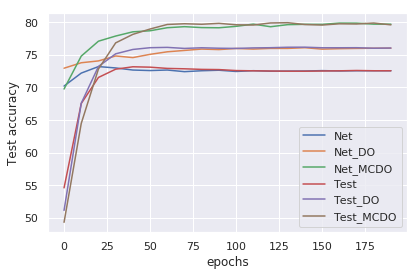

In [14]:
sns.set()
epochs = [10*i for i in range(20)]
plt.plot(epochs, net_scores[:20],label='Net')
plt.plot(epochs, net_scores[20:40], label='Net_DO')
plt.plot(epochs, net_scores[40:], label='Net_MCDO')
plt.plot(epochs, test_scores[:20],label='Test')
plt.plot(epochs, test_scores[20:40], label='Test_DO')
plt.plot(epochs, test_scores[40:], label='Test_MCDO')
plt.xlabel('epochs')
plt.ylabel('Test accuracy')
plt.legend()
plt.tight_layout()
plt.show()